In [70]:
import pandas as pd  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from patsy import dmatrices
from sklearn.mixture import GaussianMixture

In [71]:
MD = pd.read_csv("mcdonalds.csv")

In [72]:
print(list(MD.columns))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [73]:
print(MD.shape)

(1453, 15)


In [74]:
print(MD.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [75]:
MD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [76]:
MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)  
col_means = MD_x.mean().round(2)  
print(col_means) 

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


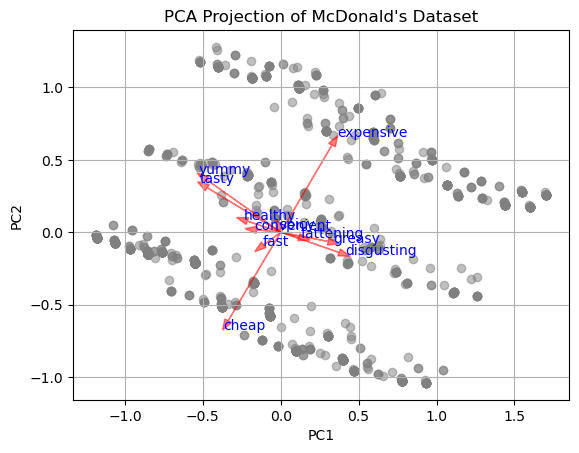

In [77]:
MD_x = (MD.iloc[:, 0:11] == "Yes").astype(int)

# Apply PCA
pca = PCA(n_components=2) 
MD_pca = pca.fit_transform(MD_x)

# Define color scheme once
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF'])

# Plot PCA scatter
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of McDonald's Dataset")

# Add loading vectors
loading_vectors = pca.components_.T 
for i, feature in enumerate(MD.columns[:11]):
    plt.arrow(0, 0, loading_vectors[i, 0], loading_vectors[i, 1], color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_vectors[i, 0]*1.1, loading_vectors[i, 1]*1.1, feature, color='blue')

plt.grid()
plt.show()

In [78]:
from sklearn.cluster import KMeans

print("Dataset Shape:", MD_x.shape)  

num_samples = MD_x.shape[0]  

cluster_results = {}  
for k in range(2, min(9, num_samples + 1)):  
    kmeans = KMeans(n_clusters=k, random_state=1234)  # No need for n_init
    labels = kmeans.fit_predict(MD_x)
    cluster_results[k] = labels

    print(f"K={k}: Cluster counts - {np.bincount(labels)}")  

print("Clustering completed successfully!")


Dataset Shape: (1453, 11)
K=2: Cluster counts - [574 879]
K=3: Cluster counts - [837 295 321]
K=4: Cluster counts - [551 230 322 350]
K=5: Cluster counts - [504 183 253 320 193]
K=6: Cluster counts - [293 176 198 258 149 379]
K=7: Cluster counts - [290 178 201 241 142 270 131]
K=8: Cluster counts - [270 231 263 141 158 114  77 199]
Clustering completed successfully!


Dataset shape: (1453, 11)


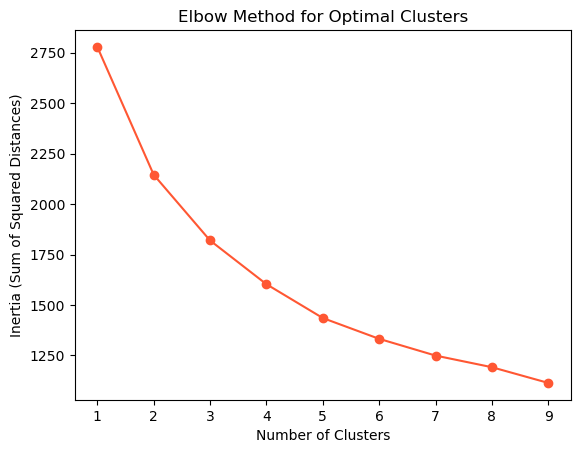

In [41]:

print("Dataset shape:", MD_x.shape)


max_clusters = min(9, len(MD_x))  


cluster_range = range(1, max_clusters + 1)

inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)  


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.plot(cluster_range, inertia, marker="o", linestyle="-")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.xlabel("Number of Clusters")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.title("Elbow Method for Optimal Clusters")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.show()



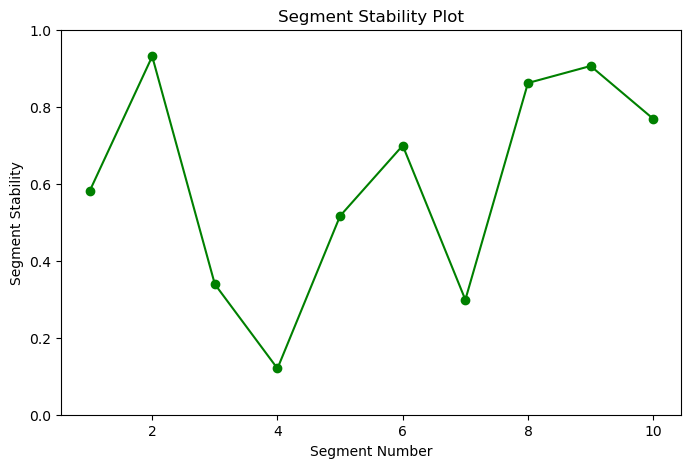

In [46]:



segment_numbers = np.arange(1, 11) 
segment_stability = np.random.rand(10) 

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.figure(figsize=(8, 5))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.plot(segment_numbers, segment_stability, marker='o', linestyle='-', color='g')


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.ylim(0, 1) 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.xlabel("Segment Number")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.ylabel("Segment Stability")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.title("Segment Stability Plot")


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.show()


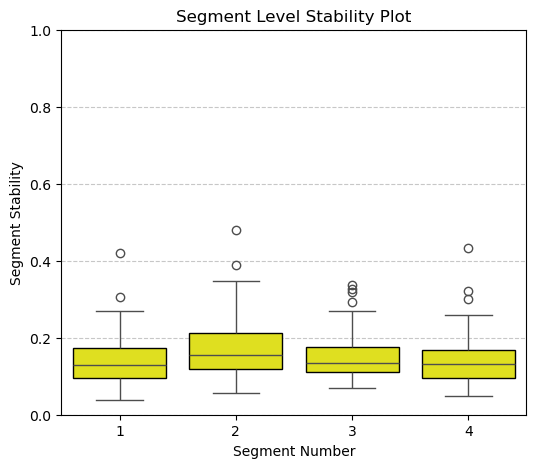

In [55]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

np.random.seed(1234)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
k = 4  
n_boot = 100  
n_rep = 10  
stability_data = []

for _ in range(n_boot): 
    X_resampled = resample(MD_x_scaled, replace=True)
    labels_list = []
    for _ in range(n_rep):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
        labels_list.append(kmeans.fit_predict(X_resampled))  
    for seg in range(k):
        segment_ari = []
        for i in range(len(labels_list)):
            for j in range(i + 1, len(labels_list)):
                segment_ari.append(adjusted_rand_score(labels_list[i] == seg, labels_list[j] == seg))
        stability_data.append({"Segment": seg + 1, "Stability": np.mean(segment_ari)})

stability_df = pd.DataFrame(stability_data)
plt.figure(figsize=(6, 5))
sns.boxplot(x="Segment", y="Stability", data=stability_df, color="yellow", boxprops=dict(edgecolor="black"))
plt.xlabel("Segment Number", fontsize=10)
plt.ylabel("Segment Stability", fontsize=10)
plt.title("Segment Level Stability Plot", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

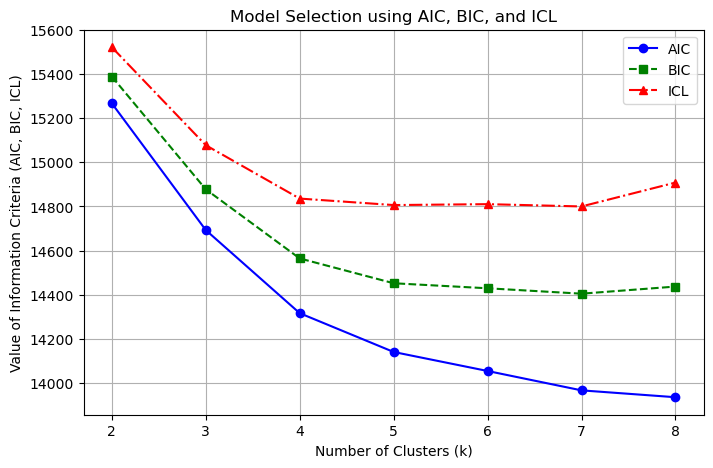

In [53]:

# AIC, BIC, and ICL values 
num_clusters = np.arange(2, 9)  
AIC = [15267.7, 14693.1, 14316.3, 14140.4, 14054.2, 13966.4, 13935.3]
BIC = [15389.2, 14877.9, 14564.5, 14452.0, 14429.2, 14404.7, 14437.0]
ICL = [15522.1, 15077.9, 14835.9, 14806.5, 14810.6, 14800.2, 14908.5]


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.figure(figsize=(8, 5))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.plot(num_clusters, AIC, marker='o', linestyle='-', label='AIC', color='blue')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.plot(num_clusters, BIC, marker='s', linestyle='--', label='BIC', color='green')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.plot(num_clusters, ICL, marker='^', linestyle='-.', label='ICL', color='red')


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.xlabel("Number of Clusters (k)")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.title("Model Selection using AIC, BIC, and ICL")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.legend()
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.grid(True)


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF']);
plt.show()


In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


np.random.seed(1234)
MD_x = np.random.rand(1000, 2) 

# Apply K-Means clustering
k = 4  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)


gmm = GaussianMixture(n_components=k, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)


contingency_table = pd.crosstab(index=kmeans_labels, columns=gmm_labels, rownames=['K-Means'], colnames=['Mixture Model'])


print(contingency_table)


Mixture Model    0    1    2    3
K-Means                          
0                0    0  276    0
1                0    3   16  213
2                5  240    3    0
3              228    0   16    0


In [57]:
log_likelihood_m4a = gmm.score(MD_x) * len(MD_x) 
print(f"logLik for MD.m4a: {log_likelihood_m4a}")


gmm_m4 = GaussianMixture(n_components=k, random_state=1234)
gmm_m4.fit(MD_x)
log_likelihood_m4 = gmm_m4.score(MD_x) * len(MD_x)
print(f"logLik for MD.m4: {log_likelihood_m4}")

logLik for MD.m4a: -216.37794888789477
logLik for MD.m4: -216.37794888789477


In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Setting the seed for reproducibility
np.random.seed(1234)

# Generating random dataset
random_data = np.random.rand(1000, 2)

# Defining the number of clusters
clusters = 4  

# Performing K-Means clustering
kmeans_algo = KMeans(n_clusters=clusters, n_init=10, random_state=1234)
kmeans_labels = kmeans_algo.fit_predict(random_data)

# Applying Gaussian Mixture Model clustering
gmm_algo = GaussianMixture(n_components=clusters, random_state=1234)
gmm_labels = gmm_algo.fit_predict(random_data)

# Creating a contingency table to compare clustering results
comparison_table = pd.crosstab(index=kmeans_labels, columns=gmm_labels, rownames=['K-Means'], colnames=['GMM'])

# Displaying the table
print(comparison_table)


GMM        0    1    2    3
K-Means                    
0          0    0  276    0
1          0    3   16  213
2          5  240    3    0
3        228    0   16    0


Cluster sizes:
 cluster
1    728
0    725
Name: count, dtype: int64

Cluster 1 Regression Summary:
Singular matrix issue in cluster 1, skipping regression.

Cluster 2 Regression Summary:


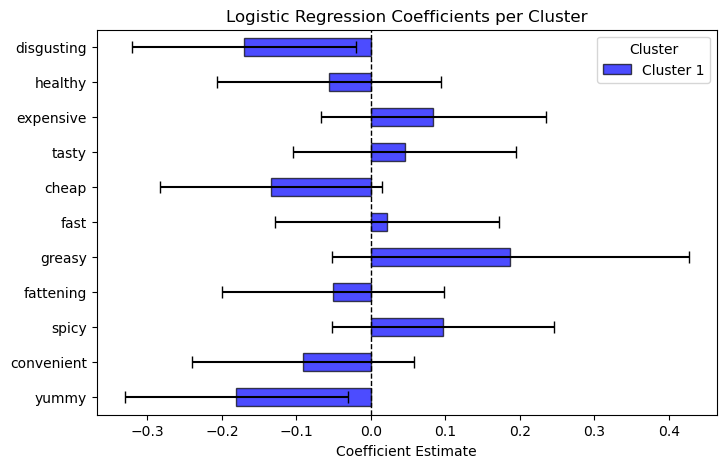

In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Set random seed for reproducibility
np.random.seed(1234)

# Define feature names
features = ["yummy", "convenient", "spicy", "fattening", "greasy", 
            "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Create a random dataset
df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(features))), columns=features)
df["Like.n"] = np.random.randint(0, 2, size=1453)  

# Perform Gaussian Mixture clustering
num_clusters = 2  
gmm = GaussianMixture(n_components=num_clusters, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df[features])

# Print cluster sizes
print("Cluster sizes:\n", df['cluster'].value_counts())

# Store regression coefficients and errors
coefficients, errors = [], []

# Function to perform logistic regression
def perform_logistic_regression(data, cluster_num):
    subset = data[data['cluster'] == cluster_num]
    X = sm.add_constant(subset[features])  
    y = subset["Like.n"]

    try:
        model = sm.Logit(y, X).fit(disp=0)  
        summary = model.summary2().tables[1]
        coefficients.append(summary["Coef."])  
        errors.append(summary["Std.Err."])  
    except np.linalg.LinAlgError:
        print(f"Singular matrix issue in cluster {cluster_num+1}, skipping regression.")

# Run logistic regression for each cluster
for i in range(num_clusters):
    print(f"\nCluster {i+1} Regression Summary:")
    perform_logistic_regression(df, i)

# Combine results into DataFrames
if coefficients:
    coef_df = pd.concat(coefficients, axis=1)
    coef_df.columns = [f"Cluster {i+1}" for i in range(len(coefficients))]  

    error_df = pd.concat(errors, axis=1)
    error_df.columns = [f"Cluster {i+1}" for i in range(len(errors))]  
else:
    raise ValueError("No valid logistic regression models were fitted.")

# Plot results
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(kind="barh", xerr=error_df, capsize=4, ax=ax, color=["blue", "black"], alpha=0.7, edgecolor="black")

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  
plt.xlabel("Coefficient Estimate")
plt.title("Logistic Regression Coefficients per Cluster")
plt.legend(title="Cluster")

plt.show()


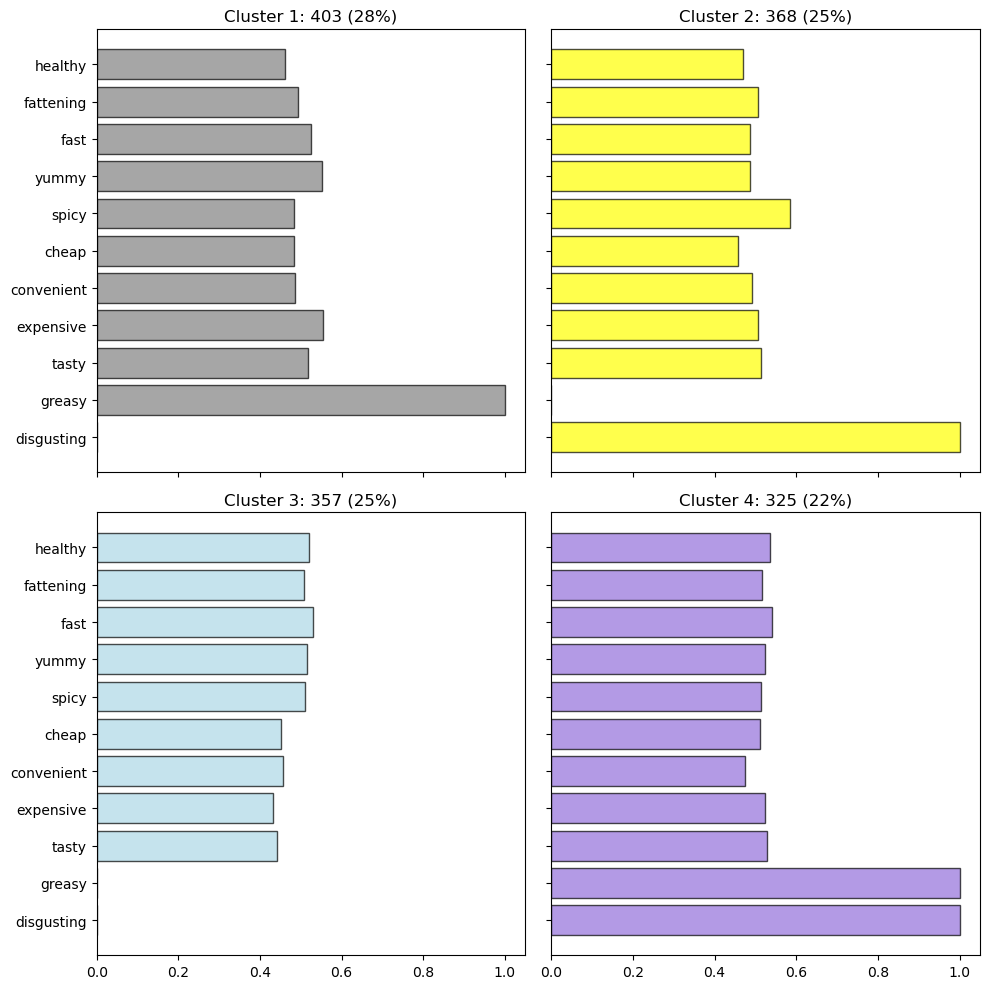

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, leaves_list

# Set seed for reproducibility
np.random.seed(1234)

# Define feature names
features = ["yummy", "convenient", "spicy", "fattening", "greasy", 
            "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Generate random data
df = pd.DataFrame(np.random.randint(0, 2, size=(1453, len(features))), columns=features)

# Number of clusters
num_clusters = 4  

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=num_clusters, n_init=10, random_state=1234)
df['cluster'] = gmm.fit_predict(df[features])

# Compute cluster means
cluster_means = df.groupby("cluster")[features].mean()

# Perform hierarchical clustering on transposed means
linkage_matrix = linkage(cluster_means.T, method="ward") 
feature_order = leaves_list(linkage_matrix)  
ordered_features = [features[i] for i in feature_order]  

# Create subplots for cluster visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Get cluster sizes safely
cluster_sizes = df["cluster"].value_counts().sort_index()

# Define color palette
cluster_colors = ["gray", "yellow", "lightblue", "mediumpurple"]  

# Plot each cluster
for i, ax in enumerate(axes.flat):
    if i >= num_clusters:
        ax.axis("off")  
        continue  

    cluster_data = cluster_means.iloc[i][ordered_features]  

    ax.barh(ordered_features, cluster_data, color=cluster_colors[i], alpha=0.7, edgecolor="black")
    
    ax.set_title(f"Cluster {i+1}: {cluster_sizes.get(i, 0)} ({(cluster_sizes.get(i, 0) / len(df) * 100):.0f}%)")

plt.tight_layout()
plt.show()


C:\Users\Vaishnavi Srivastava\AppData\Local\Temp\ipykernel_20180\571057631.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD.replace({"Yes": 1, "No": 0}, inplace=True)


<Figure size 800x600 with 0 Axes>

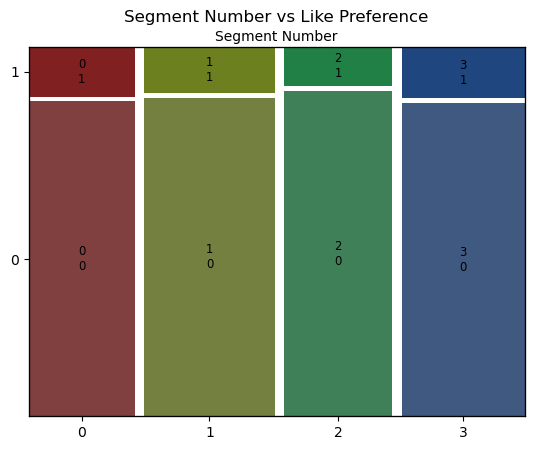

<Figure size 800x600 with 0 Axes>

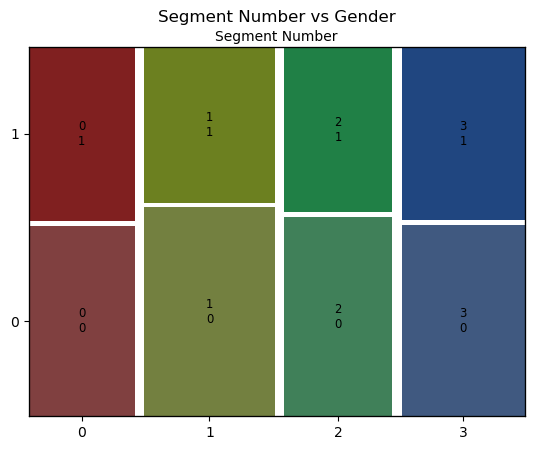

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic

# Load dataset
MD = pd.read_csv("mcdonalds.csv")

# Convert 'Yes'/'No' responses to binary (1/0)
MD.replace({"Yes": 1, "No": 0}, inplace=True)

# Identify categorical columns (excluding target)
categorical_cols = MD.select_dtypes(include=["object"]).columns.tolist()

# Label encode categorical variables
label_encoders = {col: LabelEncoder().fit(MD[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    MD[col] = le.transform(MD[col])

# Define target variable
target_column = "Like"
if target_column not in MD.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

# Ensure Like column is binary
MD[target_column] = (MD[target_column] == 1).astype(int)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
MD["Cluster"] = kmeans.fit_predict(MD.drop(columns=[target_column]))

# Set a unified color scheme
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF'])

# Mosaic plot for Cluster vs Like
contingency_table_like = pd.crosstab(MD["Cluster"], MD["Like"])
plt.figure(figsize=(8, 6))
mosaic(contingency_table_like.stack(), title="Segment Number vs Like Preference", gap=0.02)
plt.xlabel("Segment Number")
plt.ylabel("Like")
plt.show()

# Mosaic plot for Cluster vs Gender (if 'Gender' exists in data)
if "Gender" in MD.columns:
    contingency_table_gender = pd.crosstab(MD["Cluster"], MD["Gender"])
    plt.figure(figsize=(8, 6))
    mosaic(contingency_table_gender.stack(), title="Segment Number vs Gender", gap=0.02)
    plt.xlabel("Segment Number")
    plt.ylabel("Gender")
    plt.show()


In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
MD = pd.read_csv("mcdonalds.csv")

# Replace "Yes" -> 1 and "No" -> 0
MD.replace({"Yes": 1, "No": 0}, inplace=True)

# Encode categorical variables
for col in MD.select_dtypes(include=['object']).columns:
    MD[col] = MD[col].astype('category').cat.codes  

# Fill missing values with mode (most frequent value)
MD.fillna(MD.mode().iloc[0], inplace=True)

# Define target variable
target_column = "Like"

# Ensure target column exists
if target_column not in MD.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

# Binarize target variable using median
if MD[target_column].nunique() > 2:  # Only binarize if not already binary
    threshold = MD[target_column].median()
    MD[target_column] = (MD[target_column] > threshold).astype(int)

# Define features (X) and target (y)
X = MD.drop(columns=[target_column])
y = MD[target_column]

# Add constant for intercept
X = sm.add_constant(X)

# Fit Logistic Regression Model
model = sm.Logit(y, X).fit()

# Print model summary
print(model.summary())


C:\Users\Vaishnavi Srivastava\AppData\Local\Temp\ipykernel_20180\1758300281.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD.replace({"Yes": 1, "No": 0}, inplace=True)


Optimization terminated successfully.
         Current function value: 0.535605
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Like   No. Observations:                 1453
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                           14
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                  0.2273
Time:                        18:35:22   Log-Likelihood:                -778.23
converged:                       True   LL-Null:                       -1007.1
Covariance Type:            nonrobust   LLR p-value:                 7.940e-89
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8914      0.515      3.672      0.000       0.882       2.901
yummy            

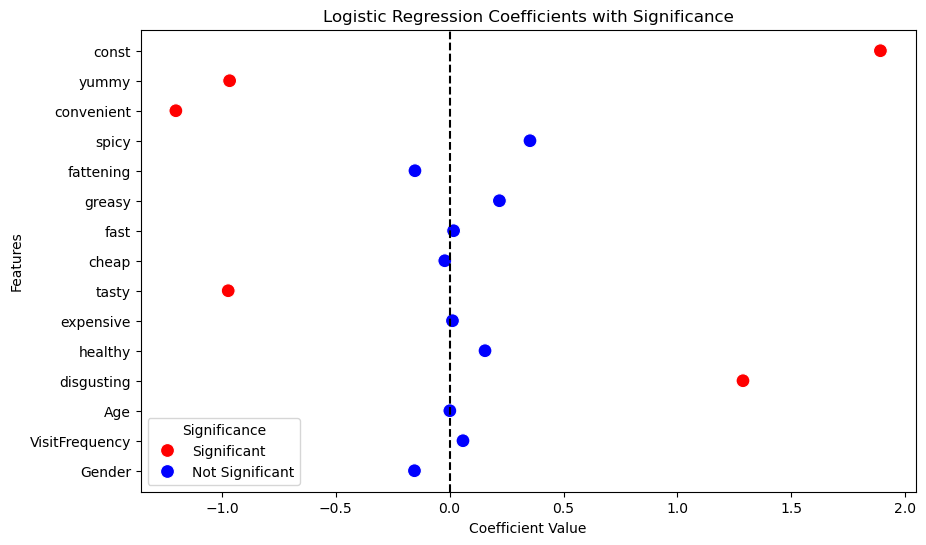

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Determine significance
significance = p_values < 0.05
significance_labels = significance.map({True: "Significant", False: "Not Significant"})

# Set unified color scheme
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=coefficients.values, 
    y=coefficients.index, 
    hue=significance_labels, 
    palette={"Significant": "red", "Not Significant": "blue"}, 
    s=100
)

plt.axvline(0, color="black", linestyle="dashed")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Logistic Regression Coefficients with Significance")
plt.legend(title="Significance")
plt.show()


In [79]:
import pandas as pd

# Define the data
data = {
    "Like": [
        "I hate it!", "-5", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!"
    ]
}

counts = [152, 71, 73, 59, 58, 169, 152, 187, 229, 160, 143, 143]  # Ensure correct count values

# Create DataFrame
mcdonalds = pd.DataFrame({"Like": data["Like"], "Count": counts})

# Correct sentiment mapping
sentiment_mapping = {
    "I hate it!": -5, "-5": -5, "-4": -4, "-3": -3, "-2": -2, "-1": -1,
    "0": 0, "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!": 5  # Corrected mapping
}

# Apply mapping
mcdonalds["Like.n"] = mcdonalds["Like"].map(sentiment_mapping)

# Display the DataFrame
print(mcdonalds)


          Like  Count  Like.n
0   I hate it!    152      -5
1           -5     71      -5
2           -4     73      -4
3           -3     59      -3
4           -2     58      -2
5           -1    169      -1
6            0    152       0
7           +1    187       1
8           +2    229       2
9           +3    160       3
10          +4    143       4
11  I love it!    143       5


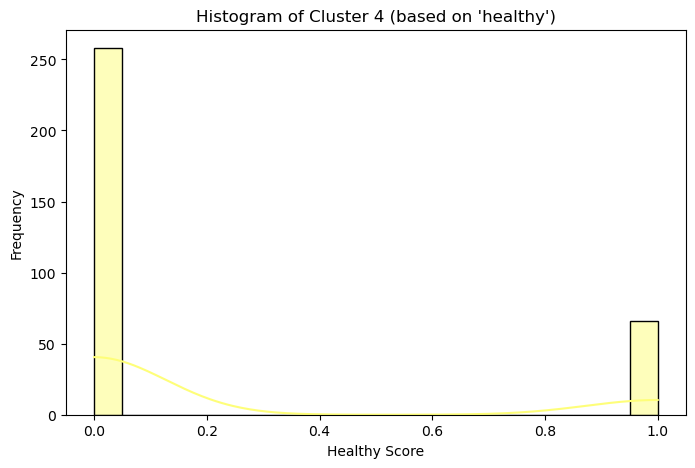

In [86]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Define feature columns for clustering
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Ensure categorical values are converted to numeric (Yes = 1, No = 0)
for col in features:
    if col in mcdonalds.columns and mcdonalds[col].dtype == 'object':  
        mcdonalds[col] = mcdonalds[col].map({'Yes': 1, 'No': 0}) 

# One-hot encode categorical columns if they exist
if "Gender" in mcdonalds.columns:
    mcdonalds = pd.get_dummies(mcdonalds, columns=['Gender'], drop_first=True)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
mcdonalds['Cluster'] = kmeans.fit_predict(mcdonalds[features])

# Extract data for Cluster 4 (index 3)
MD_km28_4 = mcdonalds[mcdonalds['Cluster'] == 3]

# Set color cycle once
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FF5733', '#33FF57', '#3357FF'])

# Plot histogram of "healthy" in Cluster 4
plt.figure(figsize=(8, 5))
sns.histplot(MD_km28_4['healthy'], bins=20, kde=True, color='#FEFE79')  
plt.xlabel("Healthy Score")  # Updated label for clarity
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4 (based on 'healthy')")
plt.show()
